In [45]:
def falsePositive(FP, TN):
    return FP/(FP + TN)


In [46]:
def falseNegative(FN, TP):
    return FN/ (FN + TP)

In [47]:
def truePositive(TP, FN):
    return TP/(TP+FN)

In [48]:
import pickle
import pandas as pd
from sklearn.metrics import *
import operator
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



def bestGuess(array, devices):
    index = np.where(array == array.max())
    index = int(index[0][0])
    return devices[index]

def bestGuessIndex(array, devices):
    index = np.where(array == array.max())
    return int(index[0][0])

def zscore(table, confidence, idxDevice):
    x = confidence  
    mean = table['Avg Conf'][idxDevice]
    stdev = table['Std Conf'][idxDevice]
    
    if stdev == 0:
        stdev = 0.0000001
        
    z = (x - mean) / stdev

    return z
    
def gotItRight(predictions_proba, predictions, devices, y):
    correct = 0
    other = 0
#     print(devices)
#     print(len(predictions_proba) == len(y))
    for i in range(len(predictions)):
        bestGuess = predictions[i]
        if devices[bestGuess] == y[i]:
            correct+=1
        else:
            other+=1
#     print("correct is " + str(correct))
#     print(len(predictions))

def makePrediction(model, unseen, devices, table, labels, threshold):
    loadedModel = pickle.load(open(model, 'rb'))
    unseen = unseen.reindex(sorted(unseen.columns), axis=1)

    
    unseen.drop(unseen.columns[unseen.columns.str.contains('Unname',case = False)],axis = 1, inplace = True)
    
    y = unseen[target].tolist() #unseen should only 1 or more devices
    
    for col in labels:
        if col in unseen.columns:
            unseen = unseen.drop(columns= [col])
#     print("length of unseen in columns is " + str(len(unseen.columns)))
    predictions = loadedModel.predict(unseen)
    
    
    predictions_proba = loadedModel.predict_proba(unseen)
#     print("length of predproba =" + str(len(predictions_proba)))
#     print("length of pred =" + str(len(predictions)))
    
    
    i = 0
    
    uncertainDevice = 0
    correctDevice = 0
    certainReplay = 0
    incorrectDevice = 0
    replayCount = 0
    caughtReplay = 0
    confusedSame = 0
    
    for i in range(0, len(predictions_proba)):
        if 'replay' in y[i].lower():
            replayCount +=1 
        myBestGuess = devices[predictions[i]]
        
        
        myBestGuessIndex = predictions[i] # Predictions contains the best guesses, myBestGuessIndex is the bestGuess for each reading
        
        confidence = predictions_proba[i].max()
        
        if zscore(table, confidence , myBestGuessIndex) < threshold: # Very Uncertain
            
            
            if 'replay' in y[i].lower(): # Uncertain and its a replay
                caughtReplay += 1
            else:
                uncertainDevice += 1 # Uncertain and it's just a device
                
        else:
            if 'replay' in y[i].lower() and 'replay' in myBestGuess:
                caughtReplay += 1
            
            elif 'replay' in y[i].lower(): # we were certain and it was a replay
#                 print(y[i], myBestGuess, confidence)
                certainReplay += 1
                
                
            elif myBestGuess == y[i]:  # Certain and got it right
                correctDevice += 1
                
            elif myBestGuess[:-2] == y[i][:-2]:
                confusedSame += 1
            else:   
                incorrectDevice += 1
#                 print(myBestGuess + " was confused with " + y[i])
                    
    gotItRight(predictions_proba, predictions, devices, y)
    
#     print("I made " + str(len(predictions)) + " predictions. I caught " 
#         + str(caughtReplay) + " replays out of " + str(replayCount)  + ". I was uncertain at a genuine device (Bad) " 
#         + str(uncertainDevice) + ". I was certain at a Replay (Very Bad)" + str(certainReplay) 
#         + ". I was certain at the right device (Very Good)" + str(correctDevice) + ". I confused model(A) with model(B) "
#         + str(confusedSame)
#         + ". I was certain but the wrong device (Very Bad)" + str(incorrectDevice))
    TP = caughtReplay
    FP = uncertainDevice
    FN = certainReplay
    TN = correctDevice + confusedSame + incorrectDevice
    FPR = falsePositive(FP, TN)
    FNR = falseNegative(FN, TP)
    TPR = truePositive(TP, FN)
    return FNR, FPR, TPR
    
if __name__ == '__main__':
    testDir = 'efficientTest.xlsx'
    path = 'efficientTrain.xlsx'
    clf_rf = 'RandomForestModel.sav'
    clf_dt = 'DecisionTreeModel.sav'
    clf_knn = 'KNNModel.sav'
    clf_gnb = 'GNBModel.sav'
    test = pd.read_excel(testDir)
    df = pd.read_excel(path)
    
    print(len(test.columns))
    target = 'Model'
    devices =  df[target].unique()
    print(len(devices))
    confidence = pd.read_excel('smallerTable' + target + '.xlsx')
    labels = ['Device','Model','App','Distance', 'Bursts']
    threshold = 0
    
            
    
#     FNR, FPR, TPR = makePrediction(clf_rf, test, devices, confidence, labels, threshold)
#     print(FNR, FPR, TPR)

    

17
14


FileNotFoundError: [Errno 2] No such file or directory: 'smallerTableModel.xlsx'

1.0 0.9984326018808778 1.5
1.0 0.9984326018808778 1.45
1.0 0.9968652037617555 1.4
1.0 0.9968652037617555 1.35
1.0 0.9968652037617555 1.3
1.0 0.9968652037617555 1.25
1.0 0.9952978056426333 1.2
1.0 0.9952978056426333 1.15
1.0 0.9952978056426333 1.1
1.0 0.9952978056426333 1.05
1.0 0.9952978056426333 1.0
1.0 0.9952978056426333 0.95
1.0 0.9843260188087775 0.9
1.0 0.9811912225705329 0.85
1.0 0.9811912225705329 0.8
1.0 0.9639498432601881 0.75
1.0 0.9639498432601881 0.7
1.0 0.932601880877743 0.65
1.0 0.8793103448275862 0.6
1.0 0.8793103448275862 0.55
1.0 0.8056426332288401 0.5
1.0 0.7852664576802508 0.45
1.0 0.6128526645768025 0.4
0.998389694041868 0.4561128526645768 0.35
0.998389694041868 0.41379310344827586 0.3
0.998389694041868 0.390282131661442 0.25
0.998389694041868 0.28213166144200624 0.2
0.998389694041868 0.28213166144200624 0.15
0.998389694041868 0.28213166144200624 0.1
0.998389694041868 0.24921630094043887 0.05
0.998389694041868 0.23981191222570533 0.0
0.9935587761674718 0.22257053291

0.10789049919484701 0.0 -8.75
0.10789049919484701 0.0 -8.8
0.10789049919484701 0.0 -8.85
0.10789049919484701 0.0 -8.9
0.10789049919484701 0.0 -8.95
0.10789049919484701 0.0 -9.0
0.10789049919484701 0.0 -9.05
0.10789049919484701 0.0 -9.1
0.10789049919484701 0.0 -9.15
0.10789049919484701 0.0 -9.2
0.10789049919484701 0.0 -9.25
0.10789049919484701 0.0 -9.3
0.10789049919484701 0.0 -9.35
0.10789049919484701 0.0 -9.4
0.10789049919484701 0.0 -9.45
0.10789049919484701 0.0 -9.5
0.10789049919484701 0.0 -9.55
0.10789049919484701 0.0 -9.6
0.10789049919484701 0.0 -9.65
0.10789049919484701 0.0 -9.7
0.10789049919484701 0.0 -9.75
0.10789049919484701 0.0 -9.8
0.10789049919484701 0.0 -9.85
0.10789049919484701 0.0 -9.9
0.10789049919484701 0.0 -9.95
0.10789049919484701 0.0 -10.0
0.10466988727858294 0.0 -10.05
0.10466988727858294 0.0 -10.1
0.10466988727858294 0.0 -10.15
0.10466988727858294 0.0 -10.2
0.10466988727858294 0.0 -10.25
0.10466988727858294 0.0 -10.3
0.10466988727858294 0.0 -10.35
0.1046698872785829

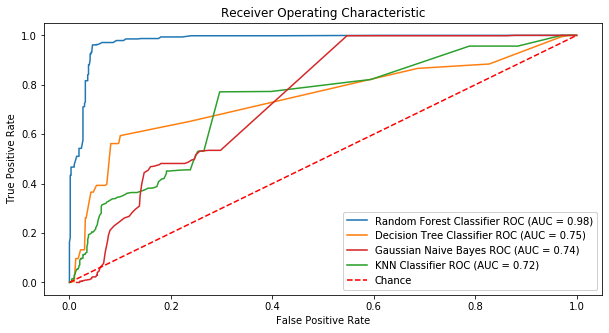

In [50]:
from sklearn.metrics import auc


count = 0
x_rf = []
y_rf = []
x_dt = []
y_dt = []
x_knn = []
y_knn = []
x_gnb = []
y_gnb = []
confidence_rf = pd.read_excel('smallertable' + target + 'RandomForest.xlsx')
confidence_dt = pd.read_excel('smallertable' + target + 'DecisionTree.xlsx')
confidence_knn = pd.read_excel('smallerTable' + target + 'KNN.xlsx')
confidence_gnb = pd.read_excel('smallerTable' + target + 'GNB.xlsx')


threshold = 1.5
while threshold > -20:
    FNR_rf, FPR_rf, TPR_rf = makePrediction(clf_rf, test, devices, confidence_rf, labels, threshold)
    print(TPR_rf, FPR_rf, threshold)
    x_rf.append(FPR_rf)
    y_rf.append(TPR_rf)
    threshold -= 0.05
    threshold = round(threshold, 4)

print("done")
print(min(x_rf))
print(max(x_rf))
print(max(y_rf))
print(min(y_rf))


threshold = 10
while threshold > -20:
    FNR_dt, FPR_dt, TPR_dt = makePrediction(clf_dt, test, devices, confidence_dt, labels, threshold)
    x_dt.append(FPR_dt)
    y_dt.append(TPR_dt)
    threshold -= 0.05
    threshold = round(threshold, 4)
print(min(x_dt))
print(max(x_dt))
print(max(y_dt))
print(min(y_dt))
    
threshold = 10
while threshold > -30:
    FNR_knn, FPR_knn, TPR_knn = makePrediction(clf_knn, test, devices, confidence_knn, labels, threshold)
    x_knn.append(FPR_knn)
    y_knn.append(TPR_knn)
    threshold -= 0.05
    threshold = round(threshold, 4)
print(min(x_knn))
print(max(x_knn))
print(max(y_knn))
print(min(y_knn))

threshold = 10
while threshold > -30:
    FNR_gnb, FPR_gnb, TPR_gnb = makePrediction(clf_gnb, test, devices, confidence_gnb, labels, threshold)
    x_gnb.append(FPR_gnb)
    y_gnb.append(TPR_gnb)
    threshold -= 0.05
    threshold = round(threshold, 4)
    
print(min(x_gnb))
print(max(x_gnb))
print(max(y_gnb))
print(min(y_gnb))




fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
label_rf= "Random Forest Classifier ROC (AUC = " + str(round(auc(x_rf,y_rf), 2)) + ")"
line1, = ax.plot(x_rf, y_rf, label=label_rf)

label_dt= "Decision Tree Classifier ROC (AUC = " + str(round(auc(x_dt,y_dt), 2)) + ")"
line2, = ax.plot(x_dt, y_dt, label=label_dt)

label_knn = "KNN Classifier ROC (AUC = " + str(round(auc(x_knn,y_knn), 2)) + ")"
line3, = ax.plot(x_knn, y_knn, label=label_knn)

label_gnb = "Gaussian Naive Bayes ROC (AUC = " + str(round(auc(x_gnb,y_gnb), 2)) + ")"
line4, = ax.plot(x_gnb, y_gnb, label=label_gnb)

x = np.linspace(0, 1, 2)
y = x
line5, = ax.plot(x, y, '-r', label='Chance',  linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

first_legend = plt.legend(handles=[line1, line2, line4, line3, line5], loc='lower right')

# Add the legend manually to the current Axes.


ax.set_title('Receiver Operating Characteristic')

ax = plt.gca().add_artist(first_legend)



print("Done")